<a href="https://colab.research.google.com/github/anishkrr/churn-prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn Flask


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
# Load the dataset from the uploaded CSV file
data = pd.read_csv('Churn_Modelling.csv')
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64
          RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10002.000000  1.000200e+04  10002.000000  10001.000000  10002.000000   
mean    5001.499600  1.569093e+07    650.555089     38.922311      5.012498   
std     2887.472338  7.193177e+04     96.661615     10.487200      2.891973   
min        1.000000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2501.250000  1.562852e+07    584.000000     32.000000      3.000000   
50%     5001.500000  1.569073e+07    652.000000     37.000000      5.000000   
75%     7501.750000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.000000  1.581569e+07    850.000000     92.000000

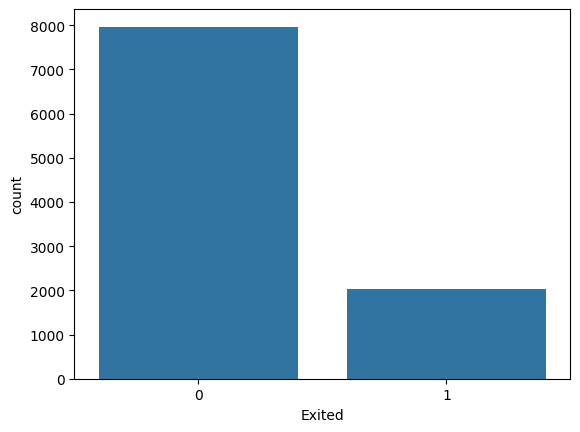

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Basic statistics
print(data.describe())

# Visualizations (optional, for deeper understanding)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Exited', data=data)
plt.show()


In [ ]:
data.dropna(inplace=True)

In [ ]:
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
data = pd.get_dummies(data, columns=['Geography', 'Surname'], drop_first=True)


In [ ]:
# Splitting Data into Training and Testing Sets
X = data.drop('Exited', axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC()
}

In [ ]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = accuracy_score(y_test, y_pred)

In [ ]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

In [ ]:
y_pred = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.844
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1572
           1       0.85      0.33      0.48       428

    accuracy                           0.84      2000
   macro avg       0.84      0.66      0.69      2000
weighted avg       0.84      0.84      0.82      2000



In [ ]:
# Save the Model
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Create a Flask App
from flask import Flask, request, jsonify

app = Flask(__name__)

In [ ]:
def predict():
    data = request.get_json(force=True)
    prediction = best_model.predict([data])
    output = prediction[0]
    return jsonify(output)

In [ ]:
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
